### Problem 4-23.

Unemployment rate data are given in Table B-8.

**(a)** Make a time series plot of the data.

**(b)** Use simple exponential smoothing with $\lambda = 0.2 $ to smooth the data.  
How well does this smoothing procedure work?  Do you think that simple exponential smoothing shuld be used to forecast this data?

### Import Excel data.

The original table B-8 had multiple date/rate pairs spread across rows,making it very difficult to import and process directly.  The table was reformmated so there are only two columns:

| Field | Description |
|:-|:-|
| Date  | Sample date in mm/dd/yyyy format |
| Rate  | Unemployment rate in percent     |


In [5]:
proc import out=Unemployment 
  datafile='Table B-8 MMDDYYYY Format.xlsx' 
  dbms=xlsx replace; 
  getnames=yes; datarow=2;
 run;

### Part (a) - Time-Series plot

The plot shows that there appears to be some periodic cycles (about 5 or so) that cycle around differing unemployment rates.  This data does not appear to be stationary.

* In the 1960s the rate drops from 6% to 2%.
* In the 1970s the rate rises to a high of 9% and ends around 5%.
* In the 1980s the rate starts and ends at 5% but has a big peak of 12%.
* In the 1990s the starts at 5%, rises to 8% and ends around 3%.
* In the 2000s the rate starts at 3%, rises to 6% and then drops to about 5% in 2005.

The data has a lot of jaggy month-to-month variation.


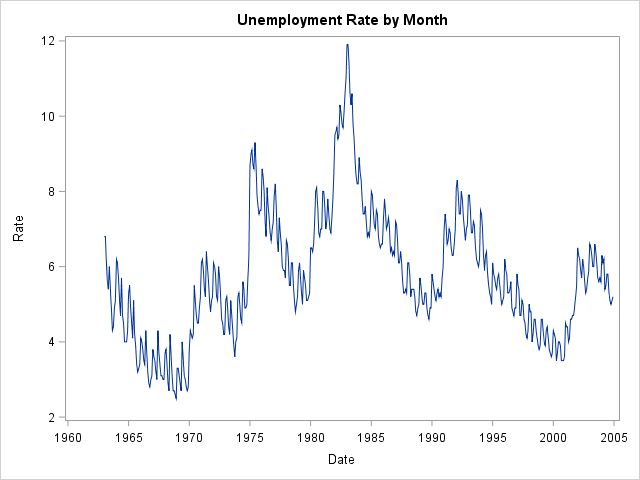

In [4]:
ods graphics on;
title "Unemployment Rate by Month";
proc sgplot data=Unemployment;
  series x=Date y=Rate;
  format date YEAR4.;
run;

### Part (b) - Exponential Smoothing

This problem states to use a $\lambda$ value of 0.2, and that means that we must use PROC FORECAST, because PROC ESM does not allow the user to specify a $\lambda$ value.  The default value of $\alpha$ for PROC FORECAST is 0.05, so we don't both specifying that.



In [9]:
title "Forecast with Exponential Smoothing";
proc forecast data=Unemployment
              method=expo
              weight=0.2
              interval=MONTH
              out=ForecastRate outfull outresid outest=est;
  id Date;
  var Rate;
run;

In [10]:
proc print data=est;
run;

Obs,_TYPE_,Date,Rate
1,N,12/01/2004,504
2,NRESID,12/01/2004,504
3,DF,12/01/2004,501
4,WEIGHT,12/01/2004,0.2
5,S1,12/01/2004,5.3570791
6,S2,12/01/2004,5.6059819
7,S3,12/01/2004,5.7801343
8,SIGMA,12/01/2004,0.5858272
9,CONSTANT,12/01/2004,5.0334259
10,LINEAR,12/01/2004,-0.101937
